In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [22]:
!nvidia-smi

Thu Sep  2 12:02:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |   4462MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [24]:
# re-size all the images to this
IMAGE_SIZE = [256, 128]

In [25]:
train_path = '/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/Dataset/Transfer Learning/Train'

In [26]:
valid_path = '/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/Dataset/Transfer Learning/Test'

In [27]:
# add preprocessing layer to the front of VGG16

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [28]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [29]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/Dataset/Transfer Learning/Train/*')

In [30]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [31]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [32]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 64, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 64, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 64, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 32, 128)       0   

In [33]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/Dataset/Transfer Learning/Train',
                                                 target_size = (256, 128),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')


Found 1080 images belonging to 2 classes.


In [36]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/Dataset/Transfer Learning/Test',
                                            target_size = (256, 128),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 310 images belonging to 2 classes.


In [37]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# save it as a h5 file


from tensorflow.keras.models import load_model

#model.save('/content/drive/MyDrive/03/Test/Model')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
216/216 [==============================] - 256s 1s/step - loss: 0.7905 - accuracy: 0.6954 - val_loss: 0.9974 - val_accuracy: 0.6129
Epoch 2/20
216/216 [==============================] - 24s 112ms/step - loss: 0.5535 - accuracy: 0.7722 - val_loss: 0.8831 - val_accuracy: 0.6323
Epoch 3/20
216/216 [==============================] - 24s 110ms/step - loss: 0.5188 - accuracy: 0.7852 - val_loss: 0.9892 - val_accuracy: 0.6258
Epoch 4/20
216/216 [==============================] - 24s 109ms/step - loss: 0.5195 - accuracy: 0.7787 - val_loss: 0.8738 - val_accuracy: 0.6581
Epoch 5/20
216/216 [==============================] - 24s 109ms/step - loss: 0.4108 - accuracy: 0.8259 - val_loss: 0.9858 - val_accuracy: 0.7161
Epoch 6/20
216/216 [==============================] - 23s 109ms/step - loss: 0.4073 - accuracy: 0.8370 - val_loss: 1.5895 - val_accuracy: 0.6323
Epoch 7/20
216/216 [==============================] - 23s 108ms/step - loss: 0.3677 - accuracy: 0.8426 - val_loss: 0.6587 - val_accu

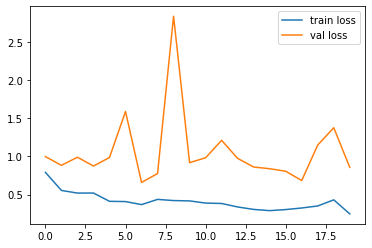

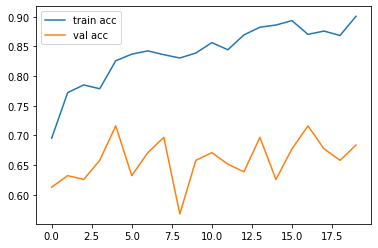

<Figure size 432x288 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')